In [13]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [45]:
data = pd.read_csv('.././data/kaggle/voice.csv')
data['label'] = data['label'].map({'male': 1, 'female': 0})
X = data.drop('label', axis=1)
y = data['label']

In [19]:
skf = StratifiedKFold(n_splits=3)
valid_scores = []

for train_idx, val_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]
    
    model = XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.01,
        objective='binary:logistic',
        eval_metric='auc'
    )
    model.fit(X_train, y_train)
    
    test_preds = model.predict(X_test)
    valid_scores.append(accuracy_score(y_test, test_preds))
    
print(valid_scores)

[0.9498106060606061, 0.978219696969697, 0.9734848484848485]


In [28]:
cols = np.array(X.columns.tolist()).reshape(-1, 1)
feature_imps = model.feature_importances_.reshape(-1, 1)
imp_df = pd.DataFrame(np.hstack((cols, feature_imps)), columns=['column', 'importance'])
imp_df['importance'] = imp_df['importance'].astype('float')

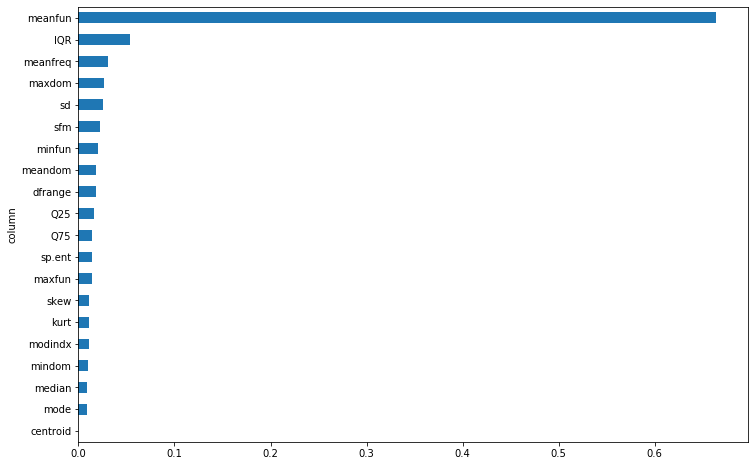

In [32]:
imp_df.sort_values(by='importance').set_index('column')['importance'].plot(kind='barh', figsize=(12, 8))

## Voice Labelling
Random labels, equally distributed.

In [46]:
voice_labels = np.random.choice([0, 1], size=len(data))
data['voice_label'] = voice_labels
data = data.drop('label', axis=1)

X = data.drop('voice_label', axis=1)
y = data['voice_label']

In [47]:
skf = StratifiedKFold(n_splits=3)
valid_scores = []

for train_idx, val_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]
    
    model = XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.01,
        objective='binary:logistic',
        eval_metric='auc'
    )
    model.fit(X_train, y_train)
    
    test_preds = model.predict(X_test)
    valid_scores.append(accuracy_score(y_test, test_preds))
    
print(valid_scores)

[0.5246212121212122, 0.5085227272727273, 0.5189393939393939]


In [48]:
cols = np.array(X.columns.tolist()).reshape(-1, 1)
feature_imps = model.feature_importances_.reshape(-1, 1)
imp_df = pd.DataFrame(np.hstack((cols, feature_imps)), columns=['column', 'importance'])
imp_df['importance'] = imp_df['importance'].astype('float')

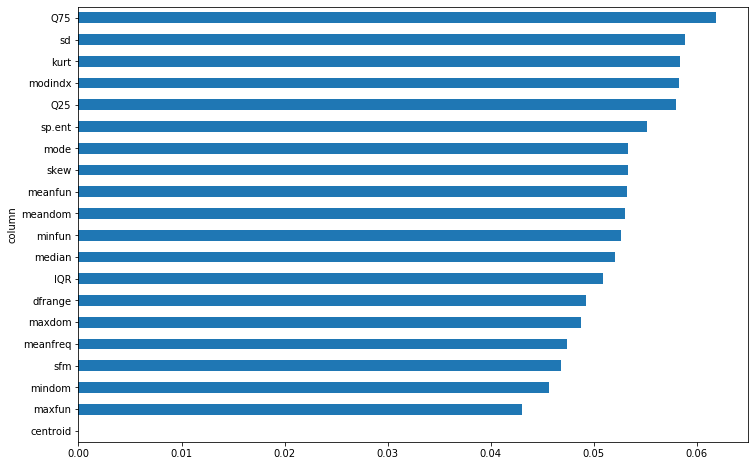

In [49]:
imp_df.sort_values(by='importance').set_index('column')['importance'].plot(kind='barh', figsize=(12, 8))